<a href="https://www.kaggle.com/code/jiprud/tps-may22-xgb-baseline?scriptVersionId=96346487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10) # make plots a bit bigger

# Load Data

In [2]:
train_df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv',index_col='id')
test_df = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv',index_col='id')

# Preprocess

## Add Features

In [3]:
import string
characters = list(string.ascii_uppercase)
def engineer_features(df):
    # decode f_27 feature
    # add one feature per character. Number of the feature says how many times is the letter contained in f_27
    # df['f_27']
    for ch in characters:
        df[ch] = df['f_27'].str.count(ch)
        
    # https://www.kaggle.com/code/slythe/relative-features-w-lightgbm
    # Get Unique letters
    #df["unique_text_str"] = df["f_27"].apply(lambda x :  ''.join([str(n) for n in list(set(x))]) )
    #df["unique_text_str"] = df["unique_text_str"].astype("category")
    df["unique_text_len"] = df.f_27.apply(lambda s: len(set(s)))
    
    df.drop('f_27',axis=1, inplace=True)
    
    # https://www.kaggle.com/competitions/tabular-playground-series-may-2022/discussion/323892
    df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
    df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    

In [4]:
X_train = train_df.drop(['target'], axis = 1)
y_train = train_df['target']
X_test = test_df

engineer_features(X_train)
engineer_features(X_test)

submission = pd.DataFrame(index = X_test.index)  # prepare df for submission

display(X_train,y_train,X_test)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,U,V,W,X,Y,Z,unique_text_len,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,0,3,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,0,5,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,0,0,0,0,0,6,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,0,4,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,0,0,0,0,0,0,5,0,0,0
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,0,0,0,0,0,0,5,0,0,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,0,0,0,0,0,0,5,0,0,0


id
0         0
1         1
2         1
3         1
4         1
         ..
899995    1
899996    0
899997    0
899998    0
899999    1
Name: target, Length: 900000, dtype: int64

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,U,V,W,X,Y,Z,unique_text_len,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,0,0,0,0,0,0,5,0,0,1
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,0,0,0,0,0,0,6,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,0,0,0,0,0,0,5,-1,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,0,0,0,0,0,0,5,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,...,0,0,0,0,0,0,6,0,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,...,0,0,0,0,0,0,6,0,0,0
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,...,0,0,0,0,0,0,6,0,0,0


## Feature Selection

https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

### Remove Constant Features

In [5]:
# constant columns
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.00)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold()

In [6]:
# print constant features
to_drop = X_train.columns[~sel.get_support()]
to_drop

Index(['U', 'V', 'W', 'X', 'Y', 'Z'], dtype='object')

In [7]:
X_train.drop(to_drop,axis=1,inplace=True)
X_test.drop(to_drop,axis=1,inplace=True)

In [8]:
# # drop constant columns
# X_train = sel.transform(X_train)
# X_test = sel.transform(X_test)

In [9]:
X_train

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,O,P,Q,R,S,T,unique_text_len,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,0,3,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,0,5,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,0,0,0,0,0,6,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,0,4,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,0,0,0,0,0,0,5,0,0,0
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,0,0,1,0,0,0,5,0,0,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,0,0,0,0,0,0,5,0,0,0


# Model

In [10]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
        n_estimators = 600,
        learning_rate = 0.2106438439544827,
        gamma = 0.27461206167034957,
        max_depth = 9,
        subsample = 0.9974663532226815,
        reg_lambda = 0.27324005545671887,
        reg_alpha = 4.80290864576712)

# https://www.kaggle.com/code/davidhammond/may-tp-xgboost-parameter-search

### Validation

For the time purpose I use just a subset of the data.

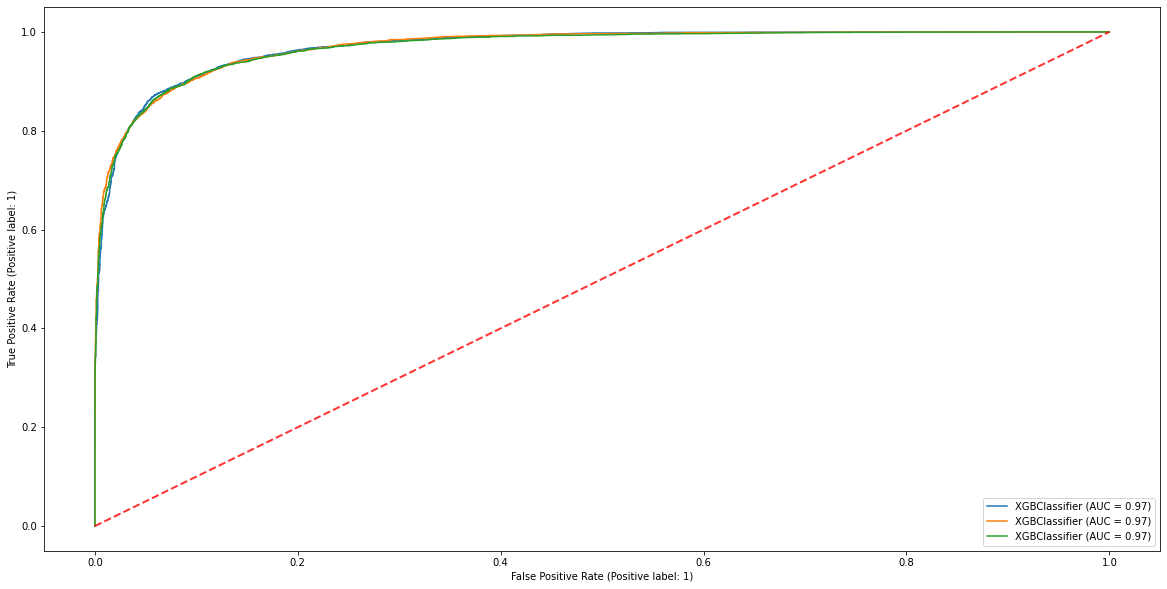

CPU times: user 8min 43s, sys: 1.28 s, total: 8min 44s
Wall time: 2min 13s


In [11]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
skf = StratifiedKFold(n_splits = 3)
for train,test in skf.split(X_train.head(30000),y_train.head(30000)):
    model_xgb.fit(X_train.iloc[train],y_train.iloc[train])
    #prediction = model_xgb.predict(X_train.iloc[test])
    #display(prediction)
    RocCurveDisplay.from_estimator(model_xgb, X_train.iloc[test], y_train.iloc[test], ax=ax)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.show()

## Train and Predict

For the whole dataset.

In [12]:
%%time

model_xgb.fit(X_train, y_train)

CPU times: user 2h 35min 49s, sys: 7.72 s, total: 2h 35min 57s
Wall time: 39min 42s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.27461206167034957, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2106438439544827,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=9,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4.80290864576712, reg_lambda=0.27324005545671887, ...)

In [13]:
y_xgb = model_xgb.predict_proba(X_test)
y_xgb

submission['xgb'] = y_xgb[:,1] # Metric is AUC -> the probabilities of 1 will yield better results

<AxesSubplot:ylabel='Frequency'>

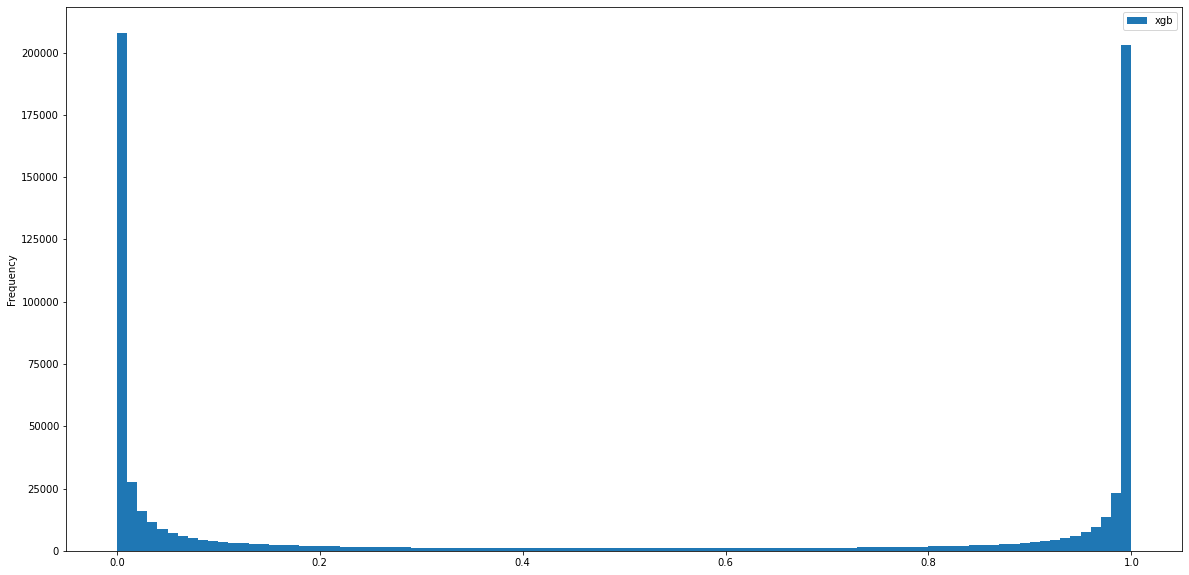

In [14]:
submission.plot.hist(bins = 100)

## Feature Importance

In [15]:
model_xgb.feature_importances_

array([0.00424264, 0.00444531, 0.00792356, 0.0055444 , 0.00371512,
       0.00512332, 0.00368071, 0.02318708, 0.01359194, 0.01207224,
       0.01049926, 0.01155281, 0.01257936, 0.00275389, 0.02014814,
       0.01362418, 0.0052541 , 0.01182116, 0.00821981, 0.01078839,
       0.00739772, 0.00974513, 0.00686551, 0.00826484, 0.01564758,
       0.01254975, 0.01085126, 0.00659007, 0.04386958, 0.03941907,
       0.01936569, 0.00784309, 0.00160627, 0.00205763, 0.00277012,
       0.00240693, 0.00199247, 0.00152236, 0.0016731 , 0.00200095,
       0.00220544, 0.00342273, 0.00488947, 0.00654502, 0.00749255,
       0.01211879, 0.01158854, 0.02013449, 0.01996465, 0.04545923,
       0.08720981, 0.12753256, 0.11587046, 0.1403597 ], dtype=float32)

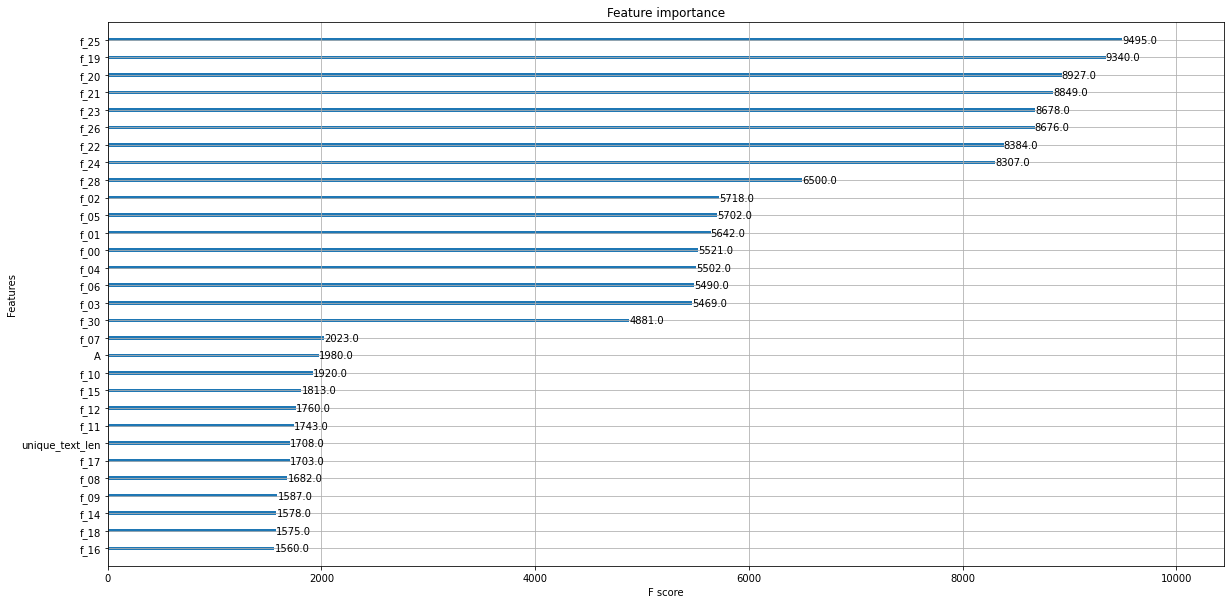

In [16]:
# show feature importance
from xgboost import plot_importance
plot_importance(model_xgb, max_num_features = 30)
plt.show()

# Submit

In [17]:
submission.to_csv('submission.csv',columns=['xgb'], header=['target'],index=True)